In [173]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from math import pi
import pandas

[-1.34069334 -1.35110976 -1.35852727 -1.3644483  -1.36913852 -1.37322219
 -1.37665362 -1.37968467 -1.38247706 -1.38492775 -1.38716728 -1.38928917
 -1.39119531 -1.39297124 -1.39468238 -1.39624203 -1.39775674 -1.39914708
 -1.40046685 -1.40176002 -1.40295651 -1.40410037 -1.40522853 -1.40627862
 -1.40731793 -1.40828846 -1.40922407 -1.41015407 -1.411026   -1.41186964
 -1.41271114 -1.41350265 -1.41427079 -1.41503917 -1.41576385 -1.41648996
 -1.41717584 -1.41784409 -1.4185151  -1.41915023 -1.41977021 -1.4203939
 -1.42098526 -1.4215808  -1.42214608 -1.42269932 -1.42325729 -1.42378763
 -1.42430737 -1.42483222 -1.4253317  -1.42582177 -1.42631722 -1.42678923
 -1.42726675 -1.42772198 -1.42816939 -1.42862245 -1.42905476 -1.42948
 -1.42991097 -1.43032255 -1.43072772 -1.43113866 -1.43153141 -1.43192995
 -1.43231101 -1.43268657 -1.43306793 -1.43343279 -1.43379261 -1.43415819
 -1.43450818 -1.43485352 -1.43520459 -1.43554087 -1.43588285 -1.43621052
 -1.43653412 -1.43686336 -1.43717899 -1.43749083 -1.437

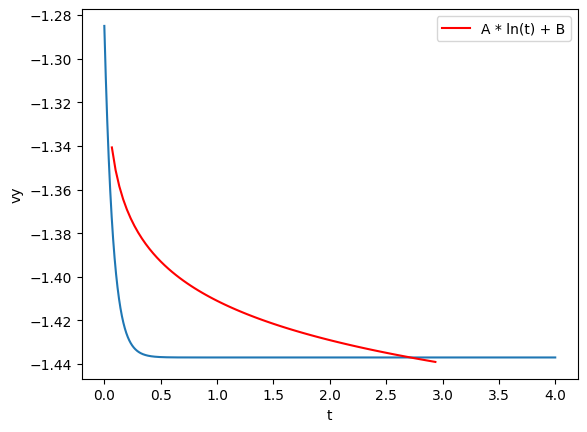

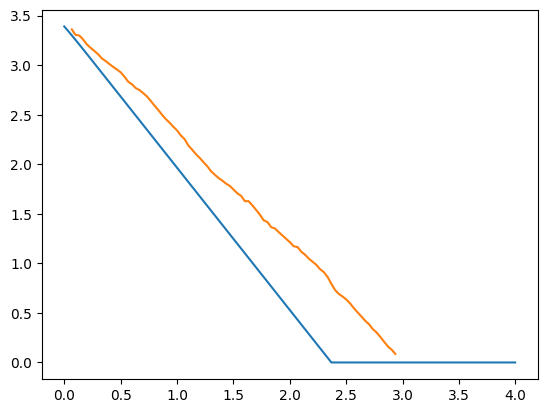

In [174]:
cd = 1.5
par = 1.1839 #densidade do ar p/ 20°C, em kg/m3
r = (35/2) * 10**(-2) #raio do paraquedas aberto, em metros
A = pi * r **2 # em metros
g = 9.8 #m/s2
m = 0.018 # kg

def modelo(X,t):
    y = X[0]
    vy = X[1]

    drag = (cd * par * vy**2 * A)/2
    peso = m * g

    dydt = vy
    dvydt = (drag/m) - (peso/m)

    if y <= 0:
        dydt = 0
        dvydt = 0

    dydt = [dydt, dvydt]
    return dydt

y0 = 3.391
vy0 = -1.285 #momento em que o paraquedas é aberto totalmente
ci = [y0, vy0]

tempo = np.arange(0,4 ,1e-3)
mod = odeint(modelo, ci, tempo)
listay = mod[:,0]
listavy = mod[:,1]

# plt.plot(tempo,listay)
plt.plot(tempo,listavy)

colunas = ['t', 'y', 'vy']
data = pandas.read_csv('novosdados.csv',names=colunas)


data = data.dropna() # tira dados vazios da lista
te = data.t.tolist() #transforma o data em uma lista tempo experimental
ye = data.y.tolist() #transforma o data em uma lista posicao ye experimental
vye = data.vy.tolist() #transforma o data em uma lista posicao vye experimental

#gerado a partir de linha de tendência logarítimica descoberta no tracker
A = 2.601E-2
B = 1.411E0

#correção logarítimica
vy_calculado = -1 * (A * np.log(te) + B)

# plt.scatter(te, vye, label='Dados reais') 
plt.plot(te, vy_calculado, label='A * ln(t) + B', color='red')
plt.xlabel('t')
plt.ylabel('vy')
plt.legend()
plt.show()

plt.plot(tempo,listay)
plt.plot(te,ye)


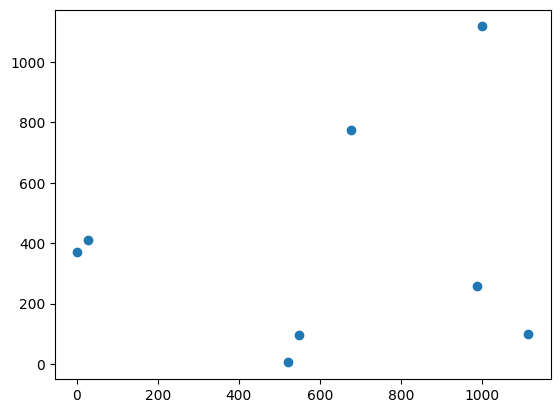

In [175]:
import matplotlib.pyplot as plt
import numpy as np

x = [548, 677, 987, 2, 29, 1114, 521, 999] 
y = [96, 775, 258, 369, 410, 99, 5, 1117]

plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
# plt.plot(x,p(x),"r--")